In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 11 Dimensionality Reduction Techniques

Many Data Science/Machine Learning/AI problems involve thousands or even millions of features. 
Not only do all these features make training extremely slow, but they can also make it much harder to find a good solution. 
This problem is often referred to as the **curse of dimensionality**.

# 11.1 - The Curse of Dimensionality

Hihg-dimensional spaces have a number of unintuitive properties.
In this Jupyter Notebook, we are going to explore three features of high-dimensional spaces:

    11.1.1 Almost all pairs of points are equally far away from one another.

    11.1.2 Almost any two vectors are almost orthogonal.

    11.1.3 There may be some spurious correlation between independent variables.


### 11.1.1 The Distribution of Distances in a High-Dimensional Space

Let us consider a $d$-dimensional Euclidean space. 
Suppose we choose $m$ random points in the unit cube, i.e., points $x=\begin{bmatrix} x_1 & x_2 & \cdots & x_d \end{bmatrix}$, where each $x_i$ is in range range 0 to 1.
The Euclidean distance (or 2-norm distance) beween two points $x$ and $y$ is

$$
\|x-y\|_2 = \sqrt{\sum_{i=1}^d(x_i-y_i)^2}
$$

If $d=2$, we are placing random points on a 1x1 square. 

Text(0.5, 1.0, '1000 random points on the unit square')

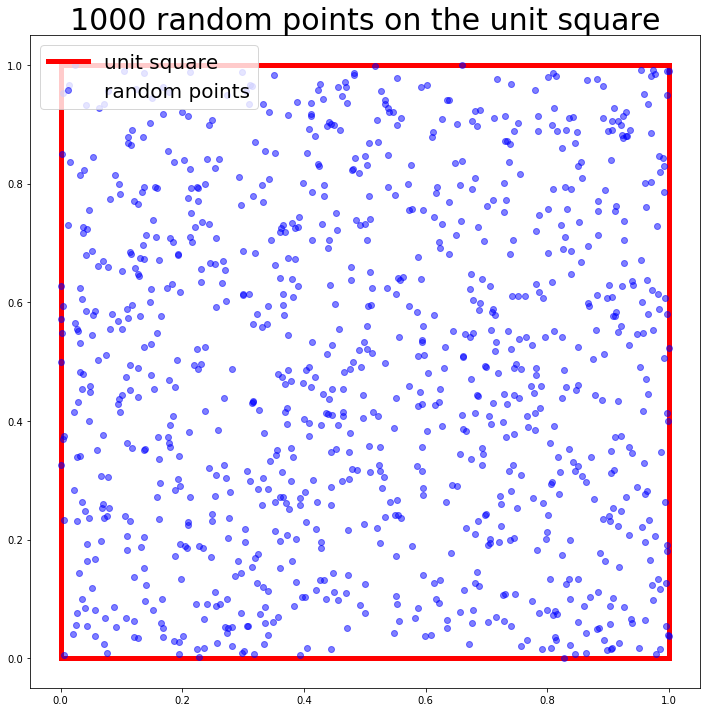

In [2]:
m = 1000
X = np.random.rand(m,2) # m random points on the unit square

plt.figure(figsize=(12,12))
'square'
plt.plot([0,1],[0,0],'r-',linewidth=5, label='unit square') # side 1
plt.plot([0,1],[1,1],'r-',linewidth=5) # side 2
plt.plot([0,0],[0,1],'r-',linewidth=5) # side 3
plt.plot([1,1],[0,1],'r-',linewidth=5) # side 4

plt.plot(X[:,0],X[:,1],'bo',alpha=0.5, label='random points')
plt.legend(fontsize=20, loc ='upper left')
plt.title(str(m)+' random points on the unit square',fontsize=30)

Some points are be very close; some points are very far away (those at or near opposite corners of the square). The average distance is roughly $\sqrt{2/6}=\sqrt{1/3}\approx 0.58$.

In [3]:
distances = [np.linalg.norm(X[i]-X[j]) for i in range(m) for j in range(i+1,m)]
print('the largest distance is '+str(np.max(distances)))
print('the smallest distance is '+str(np.min(distances)))
print('the average distance is '+str(np.mean(distances)))

the largest distance is 1.3985403606230828
the smallest distance is 0.000819759312572361
the average distance is 0.5259534532828545


When the dimension $d$ is very large, the distance between random points behaves very differently.

In [4]:
'Note: running this cell can take a while'
d = 1000 # dimension
m = 10000 # number of random points
X = np.random.rand(m,d) # generate n random points on the unit hypercurbe
distances = [np.linalg.norm(X[i]-X[j]) for i in range(m) for j in range(i+1,m)] # all pairwise distances
print('the largest distance is '+str(np.max(distances)))
print('the smallest distance is '+str(np.min(distances)))
print('the average distance is '+str(np.mean(distances)))

the largest distance is 14.182774982607045
the smallest distance is 11.594905693041921
the average distance is 12.906723754650791


**There are no pairs of points that are close!** This may be a problem when doing cluster analysis. If there are essentially no pairs of points that are close, it is hard to build clusters at all.
There is little justification for grouping one pair of points and not another.

### 11.1.2 Angles Between Vectors

Let us consider a  $d$-dimensional Euclidean space. 
Suppose we choose  two random vectors $x=\begin{bmatrix} x_1 & x_2 & \cdots & x_d \end{bmatrix}$ and $y=\begin{bmatrix} y_1 & y_2 & \cdots & y_d \end{bmatrix}$ (they can be anywhere in the space).
The angle  between the two vectors $x$ and $y$ is given by

$$
\mathrm{arccos}\left( \dfrac{\left|\sum_{i=1}^d x_iy_i\right|}{\sqrt{\sum_{i=1}^dx_i^2}\sqrt{\sum_{i=1}^d y_i^2}} \right) = 
\mathrm{arccos}\left( \dfrac{|x^Ty|}{\|x\|_2\|y\|_2} \right),
$$
i.e., the arccosine of  the absolute value of the dot product of $x$ and $y$ divided by the product of the norms of $x$ and $y$.

When $d=2$:

Text(0.5, 1.0, '100 random vectors')

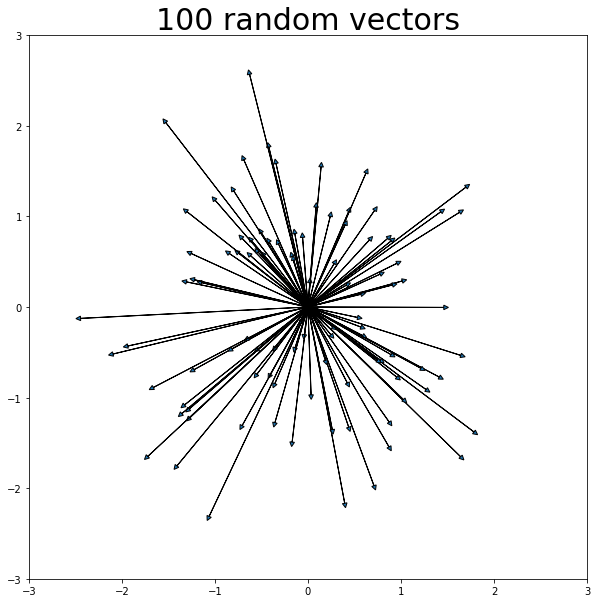

In [5]:
m = 100 
X = np.random.randn(m,2) # m random vectors

plt.figure(figsize=(10,10))
for i in range(m):
    plt.arrow(0,0,X[i,0],X[i,1],head_width = 0.05,head_length=0.05)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title(str(m)+' random vectors',fontsize=30)

Some vectors are close to being parallel; some vectors are close to being perpendicular. The average angle is roughly 45 degrees.

In [6]:
cosines = [np.abs(X[i].T@X[j])/(np.linalg.norm(X[i])*np.linalg.norm(X[j])) for i in range(m) for j in range(i+1,m)]
angles = np.arccos(cosines)
print('the largest angle is '+str((180/(np.pi))*np.max(angles))+' degrees')
print('the smallest angle is '+str((180/(np.pi))*np.min(angles))+' degrees')
print('the average angle is '+str((180/(np.pi))*np.mean(angles))+' degrees')

the largest angle is 89.99663163926424 degrees
the smallest angle is 0.017911363913781776 degrees
the average angle is 44.883754808218605 degrees


When the dimension $d$ is very large, the angle between random vectors behaves very differently.

In [7]:
'Note: running this cell can take a while'
d = 1000 # dimension
m = 10000 # number of random points
X = np.random.randn(m,d) # generate n random points
norm_X = np.linalg.norm(X,axis=1) # find all the norms
cosines = [np.abs(X[i].T@X[j])/(norm_X[i]*norm_X[j]) for i in range(m) for j in range(i+1,m)]
angles = np.arccos(cosines)
print('the largest angle is '+str((180/(np.pi))*np.max(angles))+' degrees')
print('the smallest angle is '+str((180/(np.pi))*np.min(angles))+' degrees')
print('the average angle is '+str((180/(np.pi))*np.mean(angles))+' degrees')

the largest angle is 89.99999998274733 degrees
the smallest angle is 79.63986913207523 degrees
the average angle is 88.55357538002575 degrees


**The angle between any two random vectors is almost certain to be close to 90 degrees!!**

### 11.1.3 Spurious Correlation

In Statistics, the most familiar measure of dependence between two random variables is the **Pearson correlation coefficient**.
If $\mathrm{E}[X]$ denotes the expectation of a random variable $X$, the correlation coefficient between two random variables $X$ and $Y$ is given by

$$
r = \frac{\mathrm{E}[XY]-\mathrm{E}[X]\,\mathrm{E}[Y]}{\sqrt{\mathrm{E}[X^2]-\mathrm{E}[X]^2}\sqrt{\mathrm{E}[Y^2]-\mathrm{E}[Y]^2}}
$$

The correlation coefficient $r$ is always between -1 and +1.
If the random variables $X$ and $Y$ are independent, its correlation coefficient must  be zero. 

Let us consider two independent random normally distributed variables $X$ and $Y$, and let's generate $m$ samples from each random variable.

In [8]:
m = 1000
y = np.random.randn(m)
x = np.random.randn(m)

Since the variables $X$ and $Y$ are indepentent, we know that the correlation coefficient is equal to zero. 

The sample (observed) correlation coefficient is

In [9]:
corr = np.corrcoef(x,y)[0,1]
print('the sample correlation coefficient is '+str(corr))

the sample correlation coefficient is 0.03821785719126243


The sample correlation is close to zero, as we were expecting.

Let us repeat the above experiment $n$ times.

In [10]:
m = 1000 # sample size
n = 2000 # number of random experiments


corr = np.zeros(n)
for i in range(n): 
    'generate n samples from two independent random variables'
    x = np.random.randn(m)
    y = np.random.randn(m)
    'compute the sample correlation coefficient'
    corr[i] = np.corrcoef(x,y)[0,1]
print('the largest (sample) correlation coefficient is '+str(np.max(corr)))
print('the smallest (sample) correlation coefficient is '+str(np.min(corr)))
print('the average (sample) correlation coefficient is '+str(np.mean(corr)))

the largest (sample) correlation coefficient is 0.09987709251785208
the smallest (sample) correlation coefficient is -0.09236893616299095
the average (sample) correlation coefficient is 0.0002663031794747433


We can also plot the **sampling distribution** of the correlation coefficient.
You can see that the distribution is centered at zero and have a small variance.

(-1, 1)

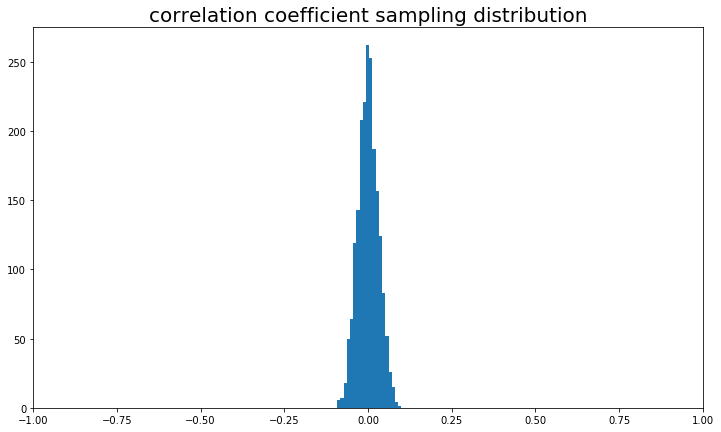

In [11]:
'sample distribution'
plt.figure(figsize=(12,7))
plt.hist(corr,bins=20)
plt.title('correlation coefficient sampling distribution',fontsize=20)
plt.xlim(-1,1)

With $d\gg m$ random variables,  the sample correlation coefficient behaves very differently.

Let us consider $d+1$ independent random normally distributed variable $X_1,X_2,\ldots,X_d$ and $Y$, and let's generate $m$ samples from each random variable.

In [12]:
d = 1000 # number of random variables 
m = 100 # sample size
y = np.random.randn(m) # random variable y
X = np.random.randn(m,d) # d random variables x1,x2,...,xd

Let us compute the sample correlation coefficients between $Y$ and the variables$X_1,X_2,\ldots,X_d$, and print the largest coefficient.

In [13]:
corr_X = np.zeros(d)
for j in range(d):
    corr_X = np.corrcoef(X[:,j],y)[0,1] # correlation between y and feature j
print(np.max(corr_X)) 

-0.026119723888413635


Let us repeat the above experiment $n$ times and compute some statistics.

In [14]:
d = 1000 # number of random variables
m = 100 # sample size
n = 2000 # number of random experiments


corr = np.zeros(n)
for i in range(n): 
    y = np.random.randn(m) # random variable y
    X = np.random.randn(m,d) # d random variables x1,x2,...,xd
    'find the correlation between y and all X variables'
    corr_X = np.zeros(d)
    for j in range(d):
        corr_X = np.corrcoef(X[:,j],y)[0,1] # correlation between y and feature j
    corr[i] = np.max(corr_X)
print('the largest correlation coefficient is '+str(np.max(corr)))
print('the smallest correlation is coefficient '+str(np.min(corr)))
print('the average correlation is '+str(np.mean(corr)))

the largest correlation coefficient is 0.4125941768969811
the smallest correlation is coefficient -0.3890359230612279
the average correlation is -0.0011806017701337006


One of the sample correlation coefficients was larger than 0.4!! But we know the correlation is zero, because all the variables are independent. 
What we are observing here is **spurious correlation**.

We can also plot the sampling distribution of the largest correlation coefficient between $Y$ and $X_1,\ldots,X_d$

In [15]:
'max correlation sampling distribution'
d = 1000 # number of random variables
m = 100 # sample size
n = 2000 # number of random experiments

corr = np.zeros(n)
for i in range(n):
    y = np. random.randn(m)
    X = np.random.randn(m,d)
    corr[i] = np.max([np.corrcoef(X[:,i],y)[0,1] for i in range(d)])

(0, 1)

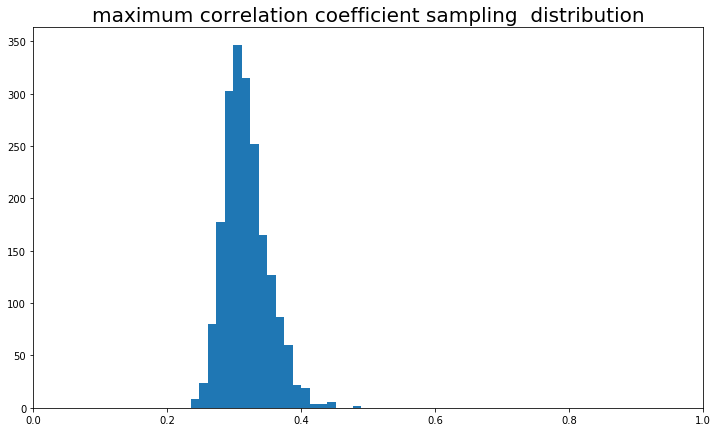

In [18]:
plt.figure(figsize=(12,7))
plt.hist(corr,bins=20)
plt.title('maximum correlation coefficient sampling  distribution',fontsize=20)
plt.xlim(0,1)

The maximum sample correlation coefficient is rarely close to zero!!

## Exercises:

**Problem 1:** For a fixed dimension $d$, generate $m=1000$ random points in the unit cube, and compute the largest, smallest and average distance between all pairs of points. 
Plot the results for $d=10000,20000,\ldots,100000$.
What do you conclude from the plot?

**Problem 2**: Prove that if you choose two points uniformly and independently on a line of length 1, then the expected distance between the points is $1/3$.

Hint: you can prove this by evaluating a double integral.

**Problem 3**: For a fixed dimension  𝑑 , generate  𝑚=1000  random vectors, and compute the largest, smallest and average angle between all pairs of vectors. Plot the results for  𝑑=10000,20000,…,100000. What do you conclude from the plot?